## PD_MIT-CS1PD dataset

### Ground truth loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nqDataLoader as nq  #data loading library
from sklearn.model_selection import train_test_split
import h5py

### Load all the files

In [2]:
# load ground Ground Truth 
cs1PdFr = pd.read_csv( 'MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv' )
# set Patient ID as index
cs1PdFr = cs1PdFr.set_index('pID')
# load ground Ground Truth 
cs2PdFr = pd.read_csv( 'MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv' )
# set Patient ID as index
cs2PdFr = cs2PdFr.set_index('pID')
# show part of Data Frame
# cs2PdFr.head()

In [3]:
filenames = ['file_1', 'file_2']
patients = pd.DataFrame(columns=['id', 'data', 'label'])
def load_all(record):
    global filenames, patients
    name = record.name
    
    arr = np.empty(shape=(0, 0))
    prArr = np.empty(shape=(0, 0))
    relArr = np.empty(shape=(0, 0))
    keyp = pd.Series()
    for filename in filenames:
        keyPressed, htArr, pressArr, releaseArr = \
                nq.getDataFiltHelper( 'MIT-CS1PD/data_MIT-CS1PD/' + cs1PdFr.loc[name][filename])
        arr = np.append(arr, htArr)
        prArr = np.append(prArr, pressArr)
        relArr = np.append(relArr, releaseArr)
        keyp = keyp.append(pd.Series(keyPressed))
        
    patients = patients.append({'id': name, 'data': arr, 'key': keyp, 'label': record['gt'], 'press': prArr, 'release': relArr}, ignore_index=True)
    return True

def load_all_d2(record):
    global patients
    filenames = ['file_1']
    name = record.name
    
    arr = np.empty(shape=(0, 0))
    prArr = np.empty(shape=(0, 0))
    relArr = np.empty(shape=(0, 0))
    keyp = pd.Series()
    for filename in filenames:
        keyPressed, htArr, pressArr, releaseArr = \
                nq.getDataFiltHelper( 'MIT-CS2PD/data_MIT-CS2PD/' + cs2PdFr.loc[name][filename])
        arr = np.append(arr, htArr)
        prArr = np.append(prArr, pressArr)
        relArr = np.append(relArr, releaseArr)
        keyp = keyp.append(pd.Series(keyPressed))
        
    patients = patients.append({'id': name, 'data': arr, 'key': keyp, 'label': record['gt'], 'press': prArr, 'release': relArr}, ignore_index=True)
    return True

def remove_quotes(row):    
    return list(row.apply(lambda x: x.replace('"', '')))

    
tmp = cs1PdFr.apply(lambda x: load_all(x), axis=1)
tmp = cs2PdFr.apply(lambda x: load_all_d2(x), axis=1)

patients.set_index('id', inplace=True)

patients['key'] = patients['key'].apply(lambda x: remove_quotes(x))

nqDataLoader.py:87: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(fileIn, dtype=None, delimiter=',', skip_header=0)


### Map key to row

In [5]:
keyss = set()

def add_to_set(row):
    global keyss
    keyss.update(row)
tmp = patients['key'].apply(lambda x: add_to_set(x))
patients.head()


,data,label,key,press,release
id,,,,,
11,"[0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...",True,"[a, b, i, a, space, u, n, a, space, v, e, a, s...","[2.4568, 2.7748, 2.9139, 3.0805, 3.1564, 3.435...","[2.6281, 2.918, 2.9794, 3.1992, 3.2301, 3.5004..."
60,"[0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...",False,"[d, e, l, space, e, n, f, a, d, o, space, l, e...","[2.6084, 2.8721, 3.9054, 5.2092, 5.893, 6.3525...","[2.6979, 2.9675, 4.0792, 5.317, 6.0589, 6.4886..."
67,"[0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...",True,"[f, u, e, space, r, e, c, o, g, i, d, o, space...","[1.3361, 1.9241, 2.6734, 3.1709, 3.6996, 4.082...","[1.4481, 2.0585, 3.0129, 3.3591, 3.8588, 4.217..."
68,"[0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...",False,"[n, t, e, r, o, comma, space, q, u, e, space, ...","[1.8314, 2.4218, 2.8949, 3.2413, 3.9616, 6.467...","[1.9508, 2.5555, 3.0796, 3.3912, 4.1754, 6.631..."
70,"[0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...",True,"[period, l, a, space, p, s, a, d, e, r, a, spa...","[0.6356, 6.0042, 6.4526, 8.0744, 9.0555, 9.484...","[0.7884, 6.2122, 6.661, 8.2283, 9.2325, 9.6897..."


In [6]:
# cs1PdFr.iloc[0].name
keyboard = {1: ['Escape', '[269025200]', '[269025201]', '[65027]', '[65104]', '[65105]', ''],
            2: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'masculine', 'exclam', 'exclamdown', 'question', 'apostrophe', 'Insert', 'Num_Lock', 'P_Subtract'], 
            3: ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P', 'Tab', 'grave', 'plus', 'Delete', 'End', 'P_Add', 'P_Home', 'P_Page_Up'], 
            4: ['a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'Caps_Lock', 'ntilde', 'parenleft', 'parenright', 'acute', 'ccedilla', 'quotedbl', 'P_Left', 'Return'], 
            5: ['z', 'x', 'c', 'v', 'b', 'n', 'm', 'Z', 'X', 'C', 'V', 'B', 'N', 'M', 'less', 'colon', 'semicolon', 'period', 'periodcentered', 'comma', 'minus', 'underscore', 'Up', 'P_End', 'P_Down', 'P_Enter', 'P_Next'], 
            6: ['space', 'Super_L', 'Left', 'Menu', 'Down', 'Right', 'P_Insert']}

# 1 is left, 2 is right
leftright = {1: ['Escape', '[269025200]', '[269025201]', '[65027]', '[65104]', '[65105]', '', '1', '2', '3', '4', '5', 'masculine', 
                 'exclam', 'exclamdown', 'q', 'w', 'e', 'r', 't', 'Q', 'W', 'E', 'R', 'T', 'Tab', 'a', 's', 'd', 'f', 'g', 
                 'A', 'S', 'D', 'F', 'G', 'Caps_Lock', 'z', 'x', 'c', 'v', 'Z', 'X', 'C', 'V', 'Super_L', 'less'],
             
             2: ['6', '7', '8', '9', '0', 'question', 'apostrophe', 'Insert', 'Num_Lock', 'P_Subtract', 'y', 'u', 'i', 'o', 'p', 
                 'Y', 'U', 'I', 'O', 'P', 'grave', 'plus', 'Delete', 'End', 'P_Add', 'P_Home', 'P_Page_Up', 'h', 'j', 'k', 'l', 
                 'H', 'J', 'K', 'L', 'ntilde', 'parenleft', 'parenright', 'acute', 'ccedilla', 'quotedbl', 'P_Left', 'Return', 
                 'b', 'n', 'm', 'B', 'N', 'M', 'space', 'Left', 'Menu', 'Down', 'Right', 'P_Insert',
                 'colon', 'semicolon', 'period', 'periodcentered', 'comma', 'minus', 'underscore', 'Up', 'P_End', 'P_Down', 'P_Enter', 'P_Next']}
patients.head()

,data,label,key,press,release
id,,,,,
11,"[0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...",True,"[a, b, i, a, space, u, n, a, space, v, e, a, s...","[2.4568, 2.7748, 2.9139, 3.0805, 3.1564, 3.435...","[2.6281, 2.918, 2.9794, 3.1992, 3.2301, 3.5004..."
60,"[0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...",False,"[d, e, l, space, e, n, f, a, d, o, space, l, e...","[2.6084, 2.8721, 3.9054, 5.2092, 5.893, 6.3525...","[2.6979, 2.9675, 4.0792, 5.317, 6.0589, 6.4886..."
67,"[0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...",True,"[f, u, e, space, r, e, c, o, g, i, d, o, space...","[1.3361, 1.9241, 2.6734, 3.1709, 3.6996, 4.082...","[1.4481, 2.0585, 3.0129, 3.3591, 3.8588, 4.217..."
68,"[0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...",False,"[n, t, e, r, o, comma, space, q, u, e, space, ...","[1.8314, 2.4218, 2.8949, 3.2413, 3.9616, 6.467...","[1.9508, 2.5555, 3.0796, 3.3912, 4.1754, 6.631..."
70,"[0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...",True,"[period, l, a, space, p, s, a, d, e, r, a, spa...","[0.6356, 6.0042, 6.4526, 8.0744, 9.0555, 9.484...","[0.7884, 6.2122, 6.661, 8.2283, 9.2325, 9.6897..."


In [22]:
def digList(lst):
    temp = []
    for item in lst:
        if type(item) is list:
            temp.append(digList(item))
        else:
            temp.append(item)
    print(set(temp))
    return set(temp)

invDict = {}
for k, v in keyboard.items():
    print(k)
    print(v)
    if type(v) is list:
        items = digList(v)
        for item in items:
            invDict[item] = invDict.get(item, [])
            invDict[item].append(k)
    else:
        invDict[v] = invDict.get(v, [])
        invDict[v].append(k)

keyboard_inv = invDict

invDict = {}
for k, v in leftright.items():
    if type(v) is list:
        items = digList(v)
        for item in items:
            invDict[item] = invDict.get(item, [])
            invDict[item].append(k)
    else:
        invDict[v] = invDict.get(v, [])
        invDict[v].append(k)

leftright_inv = invDict

1
['Escape', '[269025200]', '[269025201]', '[65027]', '[65104]', '[65105]', '']
set(['', '[65027]', '[269025200]', '[269025201]', '[65104]', '[65105]', 'Escape'])
2
['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'masculine', 'exclam', 'exclamdown', 'question', 'apostrophe', 'Insert', 'Num_Lock', 'P_Subtract']
set(['Insert', 'masculine', 'P_Subtract', 'Num_Lock', 'question', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8', 'exclam', 'apostrophe', 'exclamdown'])
3
['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P', 'Tab', 'grave', 'plus', 'Delete', 'End', 'P_Add', 'P_Home', 'P_Page_Up']
set(['End', 'P_Home', 'P_Page_Up', 'P_Add', 'plus', 'E', 'Tab', 'I', 'O', 'Q', 'P', 'R', 'U', 'T', 'W', 'Y', 'grave', 'Delete', 'e', 'i', 'o', 'q', 'p', 'r', 'u', 't', 'w', 'y'])
4
['a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'Caps_Lock', 'ntilde', 'parenleft', 'parenright', 'acute', 'ccedilla', 'quotedbl',

In [29]:
def key_to_part(value):
    return leftright_inv[value][0]

def map_part(row):
    return list(pd.Series(row).apply(lambda x: key_to_part(x)))

def key_to_row(value):
    return keyboard_inv[value][0]

def map_rows(row):
    return list(pd.Series(row).apply(lambda x: key_to_row(x)))

patients['row'] = patients['key'].apply(lambda x: map_rows(x))
patients['part'] = patients['key'].apply(lambda x: map_part(x))
# patients.head()

### Prepare training set

In [31]:
X_train, Y_train = pd.DataFrame([patients['data'], patients['row'], patients['part'], patients['press'], patients['release']]), patients.label
print(X_train)
print(Y_train)
X_train = X_train.transpose()
print(X_train)

X_train['row'] = X_train['row'].apply(lambda x: np.array(x))
X_train['part'] = X_train['part'].apply(lambda x: np.array(x))

id                                                    11    \
data     [0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...   
row      [4, 5, 3, 4, 6, 3, 5, 4, 6, 5, 3, 4, 6, 3, 3, ...   
part     [1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, ...   
press    [2.4568, 2.7748, 2.9139, 3.0805, 3.1564, 3.435...   
release  [2.6281, 2.918, 2.9794, 3.1992, 3.2301, 3.5004...   

id                                                    60    \
data     [0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...   
row      [4, 3, 4, 6, 3, 5, 4, 4, 4, 3, 6, 4, 3, 6, 3, ...   
part     [1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, ...   
press    [2.6084, 2.8721, 3.9054, 5.2092, 5.893, 6.3525...   
release  [2.6979, 2.9675, 4.0792, 5.317, 6.0589, 6.4886...   

id                                                    67    \
data     [0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...   
row      [4, 3, 3, 6, 3, 3, 5, 3, 4, 3, 4, 3, 6, 4, 3, ...   
part     [1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, ...   
press 

                                                   data  \
id                                                        
11    [0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...   
60    [0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...   
67    [0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...   
68    [0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...   
70    [0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...   
71    [0.1269, 0.1766, 0.1843, 0.1431, 0.1304, 0.165...   
72    [0.1516, 0.2453, 0.1762, 0.1335, 0.2223, 0.188...   
73    [0.0838, 0.0876, 0.0978, 0.0685, 0.0798, 0.093...   
74    [0.0557, 0.0758, 0.0704, 0.0663, 0.1005, 0.131...   
75    [0.1753, 0.1835, 0.1707, 0.1745, 0.1701, 0.165...   
76    [0.1428, 0.2186, 0.1533, 0.1742, 0.1528, 0.155...   
77    [0.0577, 0.066, 0.0654, 0.088, 0.0624, 0.065, ...   
78    [0.1342, 0.1804, 0.2044, 0.11, 0.1915, 0.1529,...   
79    [0.143, 0.128, 0.1128, 0.1311, 0.1004, 0.1077,...   
80    [0.1342, 0.1258, 0.0939, 0.1569, 0.3552, 0.119... 

In [9]:
X_train.iloc[0]['data'].shape

(4829,)

In [10]:
def find_max(df):
     return max(df['key'].apply(lambda x: len(x)))
    
def find_mean(df):
     return np.mean(df['key'].apply(lambda x: len(x)))
    
def find_min(df):
     return min(df['key'].apply(lambda x: len(x)))
    
maxlen = find_max(patients)
print(maxlen)
print('min is ', find_min(patients))


6368
('min is ', 299)


### Encoding C

In [11]:
X_train['target'] = Y_train.astype(int)
X_train.head()

,data,row,part,press,release,target
id,,,,,,
11,"[0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...","[4, 5, 3, 4, 6, 3, 5, 4, 6, 5, 3, 4, 6, 3, 3, ...","[1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, ...","[2.4568, 2.7748, 2.9139, 3.0805, 3.1564, 3.435...","[2.6281, 2.918, 2.9794, 3.1992, 3.2301, 3.5004...",1
60,"[0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...","[4, 3, 4, 6, 3, 5, 4, 4, 4, 3, 6, 4, 3, 6, 3, ...","[1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, ...","[2.6084, 2.8721, 3.9054, 5.2092, 5.893, 6.3525...","[2.6979, 2.9675, 4.0792, 5.317, 6.0589, 6.4886...",0
67,"[0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...","[4, 3, 3, 6, 3, 3, 5, 3, 4, 3, 4, 3, 6, 4, 3, ...","[1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, ...","[1.3361, 1.9241, 2.6734, 3.1709, 3.6996, 4.082...","[1.4481, 2.0585, 3.0129, 3.3591, 3.8588, 4.217...",1
68,"[0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...","[5, 3, 3, 3, 3, 5, 6, 3, 3, 3, 6, 5, 3, 3, 6, ...","[2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, ...","[1.8314, 2.4218, 2.8949, 3.2413, 3.9616, 6.467...","[1.9508, 2.5555, 3.0796, 3.3912, 4.1754, 6.631...",0
70,"[0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...","[5, 4, 4, 6, 3, 4, 4, 4, 3, 3, 4, 6, 3, 3, 3, ...","[2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, ...","[0.6356, 6.0042, 6.4526, 8.0744, 9.0555, 9.484...","[0.7884, 6.2122, 6.661, 8.2283, 9.2325, 9.6897...",1


In [12]:
reference = {'11': 1, '12': 2, '13': 3, '14': 4, '15': 5, '16': 6, '21': 7, '22': 8, '23': 9, '24': 10, '25': 11, '26': 12}

def map_index(two_arrays):
    result = []
    for idx in range(two_arrays['row'].shape[0]):
        index = str(int(two_arrays['part'][idx])) + str(int(two_arrays['row'][idx]))
        result.append(reference[index])
    return result

def levels_12(patient):
    return map_index(patient[['row', 'part']])
    
X_train['scale'] = X_train.apply(lambda patient: levels_12(patient), axis=1)

In [13]:
X_train = X_train.rename(columns={"data": "hold", "target": "label"})
patients = X_train
patients.head()

,hold,row,part,press,release,label,scale
id,,,,,,,
11,"[0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...","[4, 5, 3, 4, 6, 3, 5, 4, 6, 5, 3, 4, 6, 3, 3, ...","[1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, ...","[2.4568, 2.7748, 2.9139, 3.0805, 3.1564, 3.435...","[2.6281, 2.918, 2.9794, 3.1992, 3.2301, 3.5004...",1,"[4, 11, 9, 4, 12, 9, 11, 4, 12, 5, 3, 4, 12, 3..."
60,"[0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...","[4, 3, 4, 6, 3, 5, 4, 4, 4, 3, 6, 4, 3, 6, 3, ...","[1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, ...","[2.6084, 2.8721, 3.9054, 5.2092, 5.893, 6.3525...","[2.6979, 2.9675, 4.0792, 5.317, 6.0589, 6.4886...",0,"[4, 3, 10, 12, 3, 11, 4, 4, 4, 9, 12, 10, 3, 1..."
67,"[0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...","[4, 3, 3, 6, 3, 3, 5, 3, 4, 3, 4, 3, 6, 4, 3, ...","[1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, ...","[1.3361, 1.9241, 2.6734, 3.1709, 3.6996, 4.082...","[1.4481, 2.0585, 3.0129, 3.3591, 3.8588, 4.217...",1,"[4, 9, 3, 12, 3, 3, 5, 9, 4, 9, 4, 9, 12, 4, 3..."
68,"[0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...","[5, 3, 3, 3, 3, 5, 6, 3, 3, 3, 6, 5, 3, 3, 6, ...","[2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, ...","[1.8314, 2.4218, 2.8949, 3.2413, 3.9616, 6.467...","[1.9508, 2.5555, 3.0796, 3.3912, 4.1754, 6.631...",0,"[11, 3, 3, 3, 9, 11, 12, 3, 9, 3, 12, 5, 9, 9,..."
70,"[0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...","[5, 4, 4, 6, 3, 4, 4, 4, 3, 3, 4, 6, 3, 3, 3, ...","[2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, ...","[0.6356, 6.0042, 6.4526, 8.0744, 9.0555, 9.484...","[0.7884, 6.2122, 6.661, 8.2283, 9.2325, 9.6897...",1,"[11, 10, 4, 12, 9, 4, 4, 4, 3, 3, 4, 12, 9, 3,..."


### Encode signal

In [14]:
frequency = 100  # Hz

def encode(patient, freq=frequency):
    n_decimals = int(np.log10(freq))
    timestep = np.arange(start=0, stop=int(patient['release'][-1]), step=np.float(1.0/frequency))
    sample = np.zeros((timestep.shape[0], 1))
    patient['press'] = np.round_(patient['press'], decimals=n_decimals)
    patient['hold'] = np.round_(patient['hold'], decimals=n_decimals)
    patient['release'] = np.round_(patient['release'], decimals=n_decimals)
    
    for idx in range(patient['hold'].shape[0]):
        start = patient['press'][idx]
        finish = patient['release'][idx]
        scale = patient['scale'][idx]
        
        size_of_insert = int(np.round_((finish - start) * freq, decimals=n_decimals))
        start_id = int(start * (10 ** n_decimals))
        
        try:
            sample[start_id: start_id + size_of_insert] = scale*np.ones((size_of_insert, 1))
        except:
            sample = np.concatenate((sample, scale*np.zeros((start_id + size_of_insert - sample.shape[0], 1))))
            sample[start_id: start_id + size_of_insert] = scale*np.ones((size_of_insert, 1))
    return {'encoded': sample, 'label': patient['label']}

def enc_table(table):
    return table.apply(lambda x: encode(x), axis=1)

X_train = pd.DataFrame(enc_table(patients))
X_train = X_train[0].apply(pd.Series)
X_train['label'] = X_train['label'].astype(int)

In [15]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

/home/ao2u17/.conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


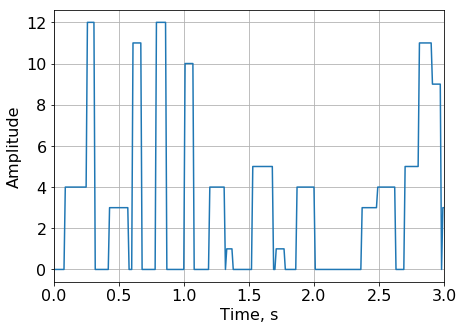

In [16]:

fig1 = plt.figure(figsize=(7, 5))
plt.plot([i/100.0 for i in range(len(X_train['encoded'].iloc[0]))], X_train['encoded'].iloc[0])
plt.xlim((0, 3))

plt.xlabel("Time, s")
plt.ylabel("Amplitude")
# plt.xticks()
# plt.legend(loc='upper right')
# plt.xlim((50, 250))
# plt.ylim((0, 100))
plt.grid()
plt.savefig('graphs/encodingc.png')
plt.show()

### Chunk each time series

In [17]:
def chunk_one_patient(series, size, overlap):
    arr = np.array(chunk_array(series['encoded'], size, overlap))
    target = np.array([series['label'] for i in range(arr.shape[0])])
    return [arr, target]

def chunk_array(array, size, overlap):
#     print(array.shape)
    gen = gen_split_overlap(array, size, overlap)
    
    result = []
    for arr in gen:
        # if it's the last arr add zeros (if it's 0.7 of size)
        if arr.shape[0] != size:
            if np.float(arr.shape[0]) / np.float(size) >= 0.7:
                arr = np.concatenate((arr, np.zeros((size - arr.shape[0], 1))))
            else:
                continue
        
        result.append(arr)
#         print(arr.shape)
    return result
    

def gen_split_overlap(seq, size, overlap):
    if size < 1 or overlap < 0:
        raise ValueError('size must be >= 1 and overlap >= 0')

    for i in range(0, len(seq) - overlap, size - overlap):            
        yield seq[i: i + size]

In [18]:
chunk_size = 500  # number of data points in one chunk
overlap = 0.0     # overlapping between chunks in percents of chunk_size
overlap = int(overlap*chunk_size)

res_df = pd.DataFrame()
res_df = X_train.apply(lambda x: chunk_one_patient(x, chunk_size, overlap), axis=1)
res_df = pd.DataFrame(res_df.apply(pd.Series))
res_df = res_df.rename(columns={0: "data", 1: "target"})

In [19]:
def split_column_target(row):
#     print(row)
    return row[1]

def split_column_data(row):
#     print(row.shape)
    return row[0]

res_df.head()
# res_df['target'] = res_df['target'].apply(lambda x: split_column_target(x))
# res_df['data'] = res_df['data'].apply(lambda x: split_column_data(x))

,data,target
id,,
11,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
60,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
67,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
68,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
70,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


### Save for pure cross val

In [20]:
# res_df.to_json('enc_Kate12_chunks{chunks}.json'.format(chunks=chunk_size))

### Old save

In [21]:
# Concatenate rows all together
train_set = np.array((0, 0, 0))
target_set = np.array(0)

def concat_train(row):
    global train_set
    try: 
        train_set.shape[0]
        train_set = np.concatenate([train_set, row])
    except:
        train_set = row

def concat_target(row):
    global target_set
    try: 
        target_set.shape[0]
        target_set = np.concatenate([target_set, row])
    except:
        target_set = row
        
tmp = res_df['data'].apply(lambda x: concat_train(x))
tmp = res_df['target'].apply(lambda x: concat_target(x))


print('X_train shape', train_set.shape)
print('Y_train shape', target_set.shape)

('X_train shape', (14806, 500, 1))
('Y_train shape', (14806,))


### Split training and testing instances

In [22]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=15)

### Save data

In [23]:
h5f = h5py.File('encoding_C_chunks{chunks}over{over}.h5'.format(chunks=chunk_size, over=overlap), 'w')
h5f.create_dataset('train', data=train_set)
h5f.create_dataset('target', data=target_set)
h5f.close()